# Connect 4 Game

In [23]:
# import matplotlib
import matplotlib.pyplot as plt
# change default styling of matplotlib
plt.style.use('ggplot')
# display matplotlib plots inline
%matplotlib inline
# display atplotlib plots correctly on high resolution screens
%config InlineBackend.figure_format='retina'
#import numpy
import numpy as np

In [24]:
from scipy.signal import convolve2d

In [90]:
class connect4Game:
    def __init__(self):
        self.board = np.zeros([6,7])
        self.red = 1
        self.yellow = -1
        self.winner = None
        
    def play(self,column,colour,quiet=False):
        if self.winner == None:
            filledIndexes = np.where(self.board[:,column]!=0)[0]
            if len(filledIndexes)==0:
                emptyRowIndex = self.board.shape[0]-1
            else:
                emptyRowIndex = filledIndexes.min()-1

            if emptyRowIndex < 0:
                raise
            else:
                self.board[emptyRowIndex,column] = colour
            self.winner = self.getWinner()
            if self.winner != None and not quiet:
                print("Wooooooooooooooooooo! {} won.".format(self.winner.capitalize()))
        else:
            raise Exception("Can't play further. {} has won.".format(self.winner.capitalize()))

    def playRed(self,column):
        self.play(column,self.red)
        
    def playYellow(self,column):
        self.play(column,self.yellow)
        
    def getWinner(self):
        # check horizontals
        kernels = [ [[1,1,1,1]],
                   [[1],[1],[1],[1]],
                   [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],
                   [[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]]]
        for kernel in kernels:
            convolution = convolve2d(self.board,kernel,'valid')
            winner = self.getWinnerFromConvolution(convolution)
            if winner != None:
                break
        return winner
        
    def getWinnerFromConvolution(self,convolution):
        if (convolution==4*self.red).any():
            return 'red'
        if(convolution==4*self.yellow).any():
            return 'yellow'
        else:
            return None
        
    def _repr_html_(self):
        plt.scatter(*np.where(np.fliplr(self.board.T)==0),linewidths=0.0,c='#ffffff',s=700)
        plt.scatter(*np.where(np.fliplr(self.board.T)==self.yellow),linewidths=0.0,c='#fff060',s=700)
        plt.scatter(*np.where(np.fliplr(self.board.T)==self.red),linewidths=0.0,c='#ce4140',s=700)
        border = np.array([-0.75,0.75])
        plt.xlim(np.array([0,self.board.shape[1]-1])+border)
        plt.ylim(np.array([0,self.board.shape[0]-1])+border)
        a=plt.gca()
        a.set_aspect('equal')
        a.set_axis_bgcolor('#4583c4')
        a.grid(False)#,alpha = 0.4)

In [25]:
g = connect4Game()

<__main__.connect4Game instance at 0x10cd97830>

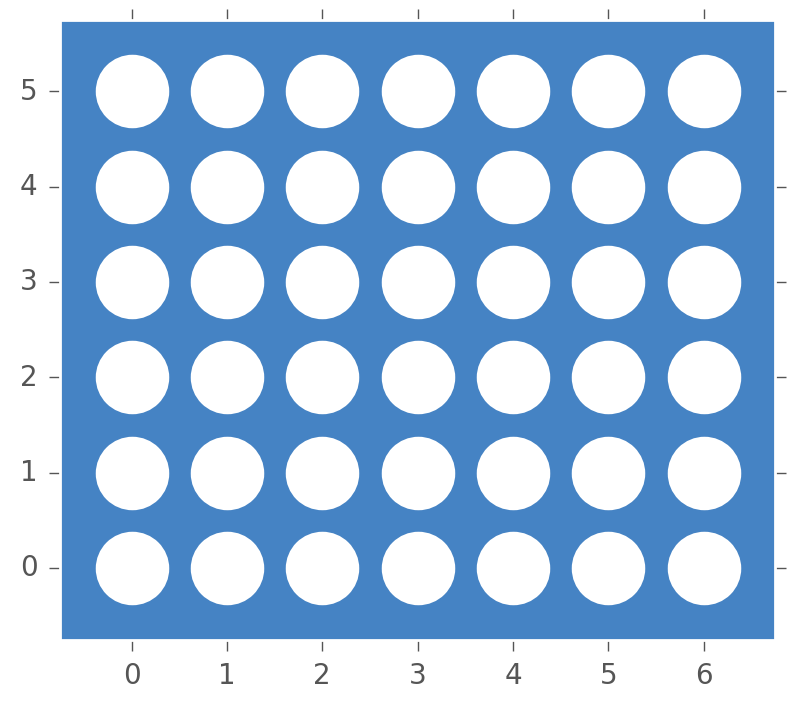

In [26]:
g

In [27]:
g.playRed(0)

In [28]:
g.playYellow(3)

In [29]:
g.playRed(3)

<__main__.connect4Game instance at 0x10cd97830>

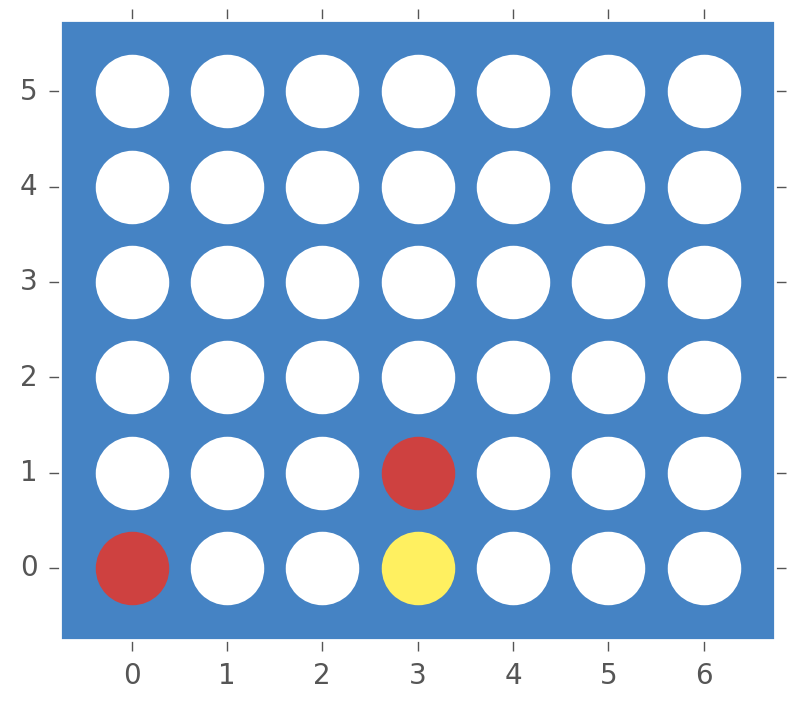

In [30]:
g

In [31]:
g.playYellow(4)
g.playRed(1)
g.playYellow(2)
g.playRed(3)
g.playYellow(5)

Wooooooooooooooooooo! Yellow won.


<__main__.connect4Game instance at 0x10cd97830>

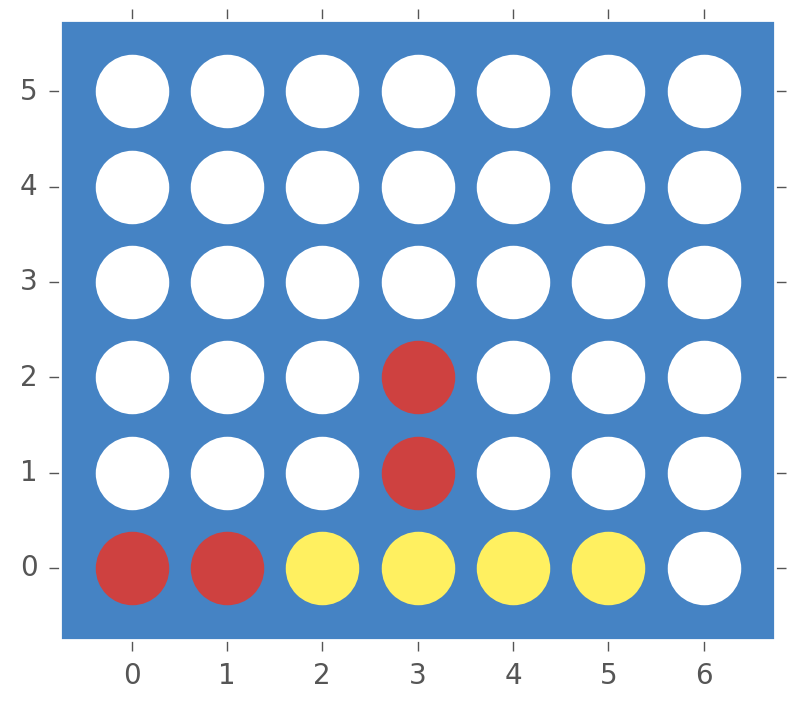

In [32]:
g

# Simple Bot

Simple algorithm:
 1. scan for lengths of 3 reds that could be completed on next turn, block them
 - otherwise play randomly

In [91]:
# initialize a new game
g = connect4Game()

# define bot player
def botPlay():
    if g.winner != 'red':
        availablePlays = np.where(g.board[0]==0)[0]
        print(availablePlays)
        blockPlay = None
        for i in availablePlays:
            currentBoard = g.board.copy()
            g.play(i,g.red,quiet=True)
            if g.winner == 'red':
                blockPlay = i
            g.board = currentBoard
            g.winner = None
        if blockPlay != None:
            print('blocking at {}'.format(blockPlay))
            g.playYellow(blockPlay)
        else:
            print('playing randomly')
            g.playYellow(np.random.choice(availablePlays,1)[0])
    else:
        print("red has won")

[0 1 2 3 4 5 6]
blocking at 5


<__main__.connect4Game instance at 0x10cab1758>

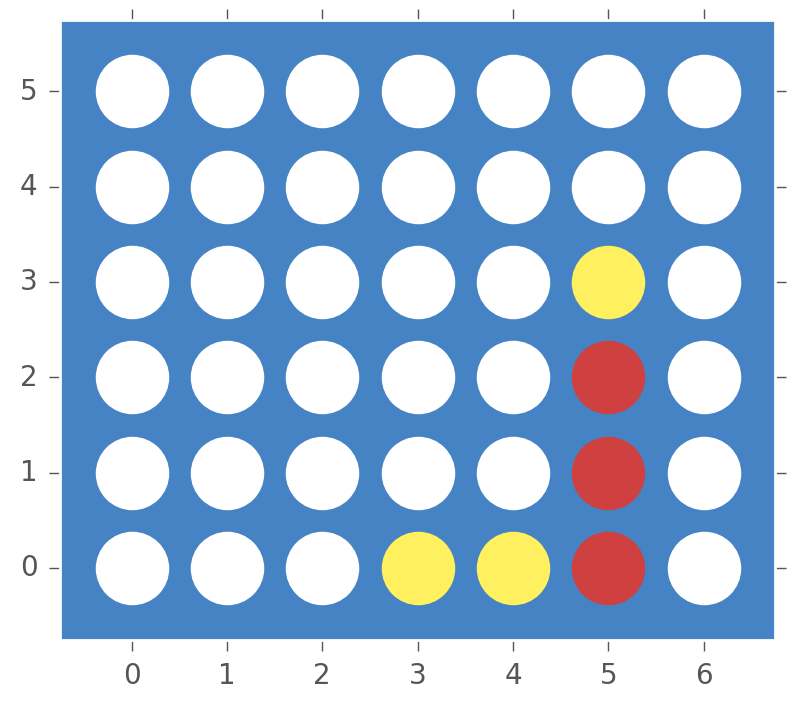

In [94]:
# to play against the computer:
# enter your column into the playRed below and execute cell.
g.playRed(5)

# make the bot play its turn
botPlay()

#display the board
g